In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
df = pd.read_csv('../data/combined_data.csv')

In [21]:
df.shape[0]

13250608

In [3]:
df_sample = df.sample(frac=0.2, random_state=42)

In [5]:
df_sample.to_csv('../data/data2700k.csv')

In [13]:
df_sample = df.sample(frac=0.05, random_state=42)

In [20]:
df_sample.to_csv('../data/data660k.csv')

In [22]:
## EDA on df_sample

df_sample.head()

,start_date,fire_ID,lat,lon,size,perimeter,start_DOY,end_date,end_DOY,duration,expansion,fire_line,speed,direction,direction_s,landcover,landcover_s,tile_ID,geometry
2566038,2005-07-02,584383,-6.7438,22.3535,0.21,1.85,183,2005-07-02,183,1,0.21,0.46,0.46,0,none,8,Woody savannas,h20v09,"POLYGON ((22.35037406370953 -6.74166666610823,..."
3258696,2005-12-06,250743,8.8188,3.2881,0.21,1.85,340,2005-12-06,340,1,0.21,0.46,0.46,0,none,9,Savannas,h18v08,POLYGON ((3.2846822924633345 8.820833332498871...
5600233,2008-07-27,640420,-15.0104,27.6267,0.86,3.70,209,2008-07-30,212,4,0.21,0.46,0.50,1,north,9,Savannas,h20v10,POLYGON ((27.620844048341272 -15.0041666653687...
3644868,2006-09-10,637240,-16.2812,24.7243,1.29,4.63,253,2006-09-10,253,1,1.29,2.78,0.85,0,none,8,Woody savannas,h20v10,POLYGON ((24.720269461331405 -16.2791666652545...
7274504,2010-09-24,396369,-12.9688,18.0960,1.71,6.48,267,2010-09-25,268,2,0.86,1.85,0.86,4,southeast,8,Woody savannas,h19v10,POLYGON ((18.090459431003897 -12.9666666655510...


In [26]:
df_sample.drop(['fire_ID', 'start_DOY', 'end_DOY', 'tile_ID', 'geometry'], inplace=True, axis=1)

In [27]:
df_sample.head()

,start_date,lat,lon,size,perimeter,end_date,duration,expansion,fire_line,speed,direction,direction_s,landcover,landcover_s
2566038,2005-07-02,-6.7438,22.3535,0.21,1.85,2005-07-02,1,0.21,0.46,0.46,0,none,8,Woody savannas
3258696,2005-12-06,8.8188,3.2881,0.21,1.85,2005-12-06,1,0.21,0.46,0.46,0,none,9,Savannas
5600233,2008-07-27,-15.0104,27.6267,0.86,3.70,2008-07-30,4,0.21,0.46,0.50,1,north,9,Savannas
3644868,2006-09-10,-16.2812,24.7243,1.29,4.63,2006-09-10,1,1.29,2.78,0.85,0,none,8,Woody savannas
7274504,2010-09-24,-12.9688,18.0960,1.71,6.48,2010-09-25,2,0.86,1.85,0.86,4,southeast,8,Woody savannas


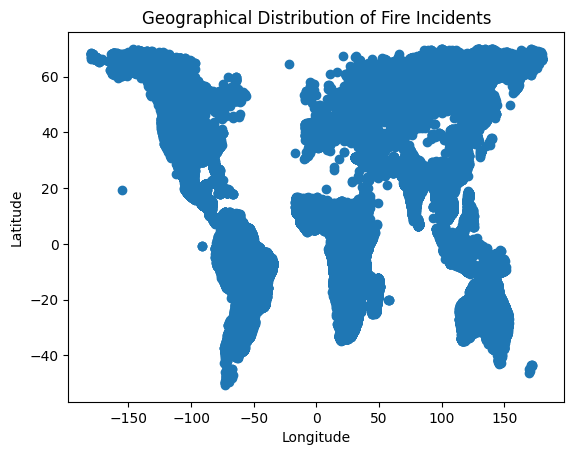

In [28]:
df = df_sample.copy()

plt.scatter(df['lon'], df['lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Fire Incidents')
plt.show()

1. color maping
2. plotting data on world map


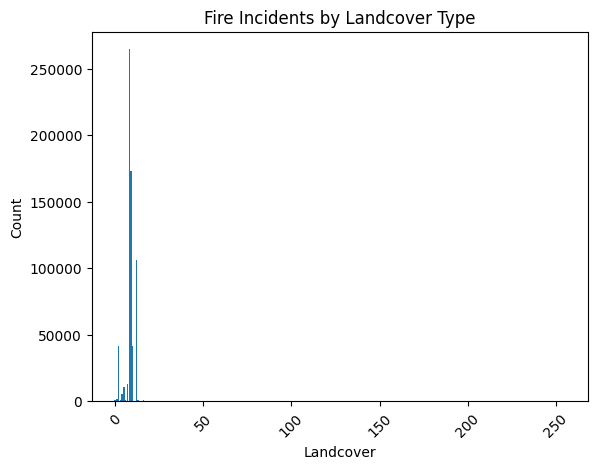

In [29]:
landcover_counts = df['landcover'].value_counts()
plt.bar(landcover_counts.index, landcover_counts.values)
plt.xlabel('Landcover')
plt.ylabel('Count')
plt.title('Fire Incidents by Landcover Type')
plt.xticks(rotation=45)
plt.show()

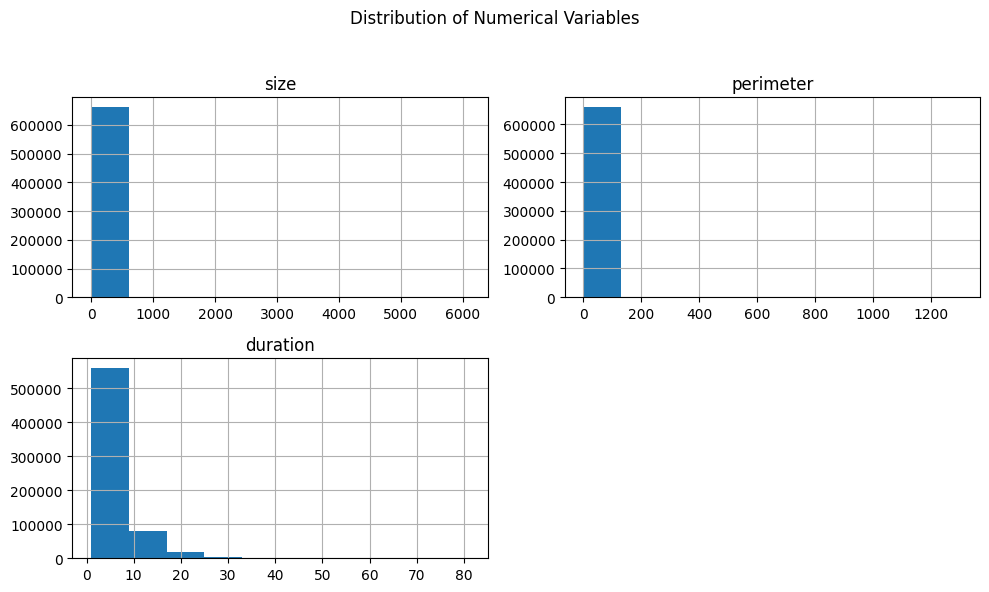

In [31]:
df[['size', 'perimeter', 'duration']].hist(bins=10, figsize=(10, 6))
plt.suptitle('Distribution of Numerical Variables')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

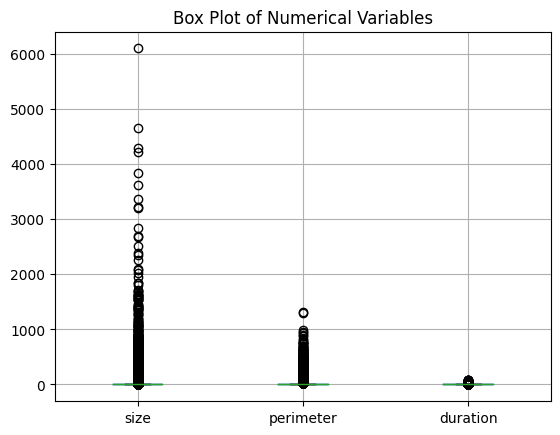

In [32]:
df[['size', 'perimeter', 'duration']].boxplot()
plt.title('Box Plot of Numerical Variables')
plt.show()

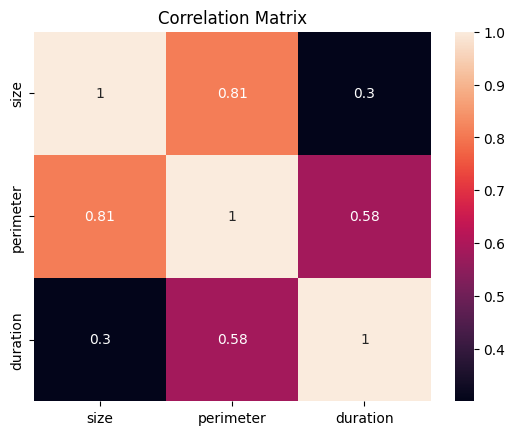

In [37]:
import seaborn as sns

correlation_matrix = df[['size', 'perimeter', 'duration']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

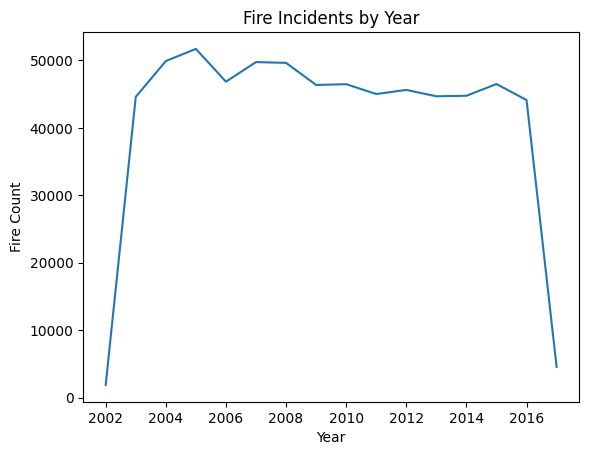

In [38]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['year'] = df['start_date'].dt.year
fire_counts_by_year = df['year'].value_counts().sort_index()
plt.plot(fire_counts_by_year.index, fire_counts_by_year.values)
plt.xlabel('Year')
plt.ylabel('Fire Count')
plt.title('Fire Incidents by Year')
plt.show()

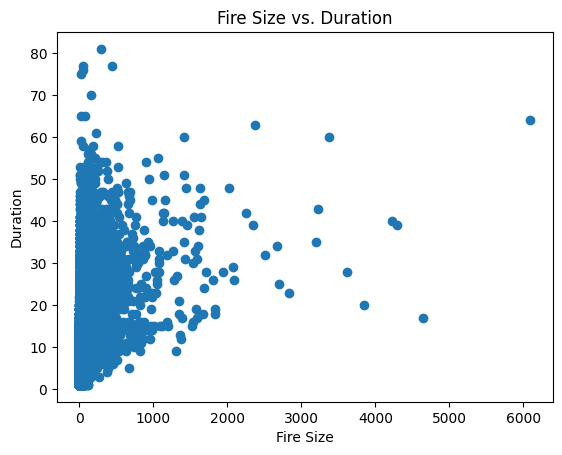

In [39]:
df_cleaned = df.dropna()

plt.scatter(df_cleaned['size'], df_cleaned['duration'])
plt.xlabel('Fire Size')
plt.ylabel('Duration')
plt.title('Fire Size vs. Duration')
plt.show()

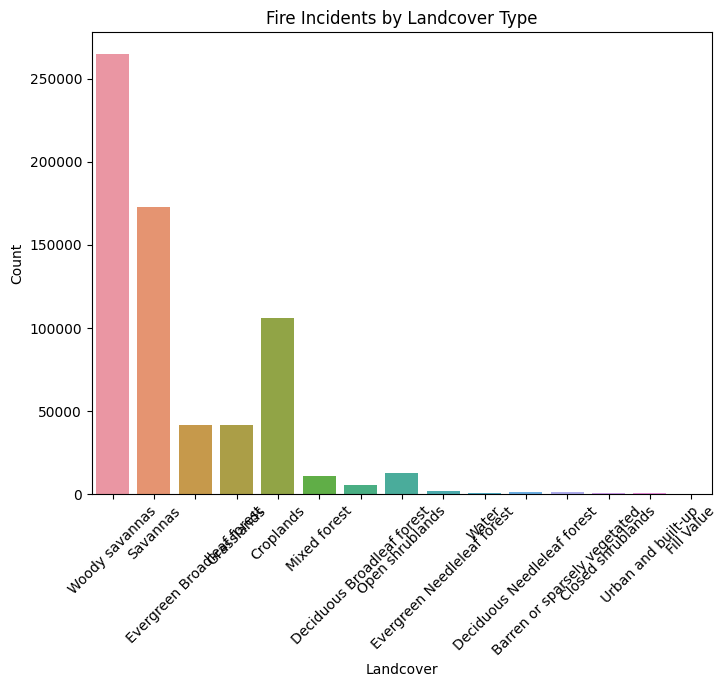

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x='landcover_s', data=df)
plt.xlabel('Landcover')
plt.ylabel('Count')
plt.title('Fire Incidents by Landcover Type')
plt.xticks(rotation=45)
plt.show()

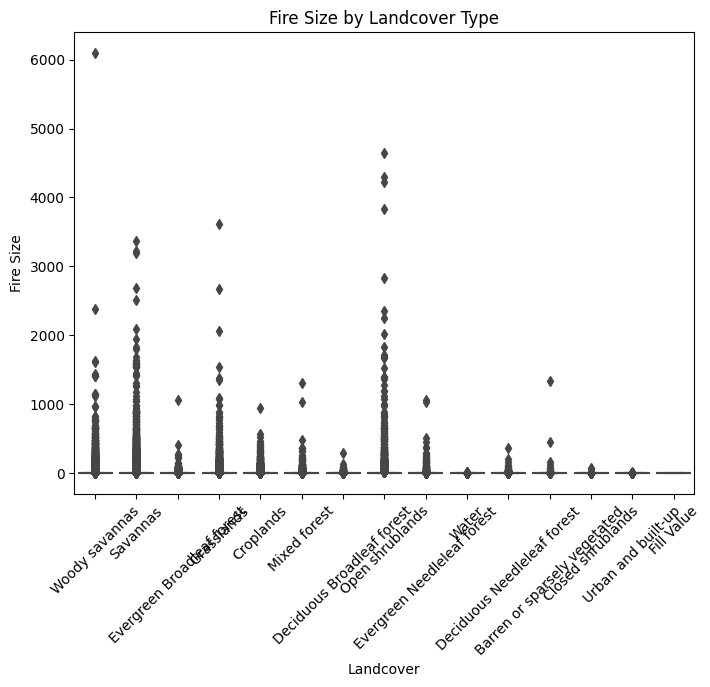

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='landcover_s', y='size', data=df)
plt.xlabel('Landcover')
plt.ylabel('Fire Size')
plt.title('Fire Size by Landcover Type')
plt.xticks(rotation=45)
plt.show()

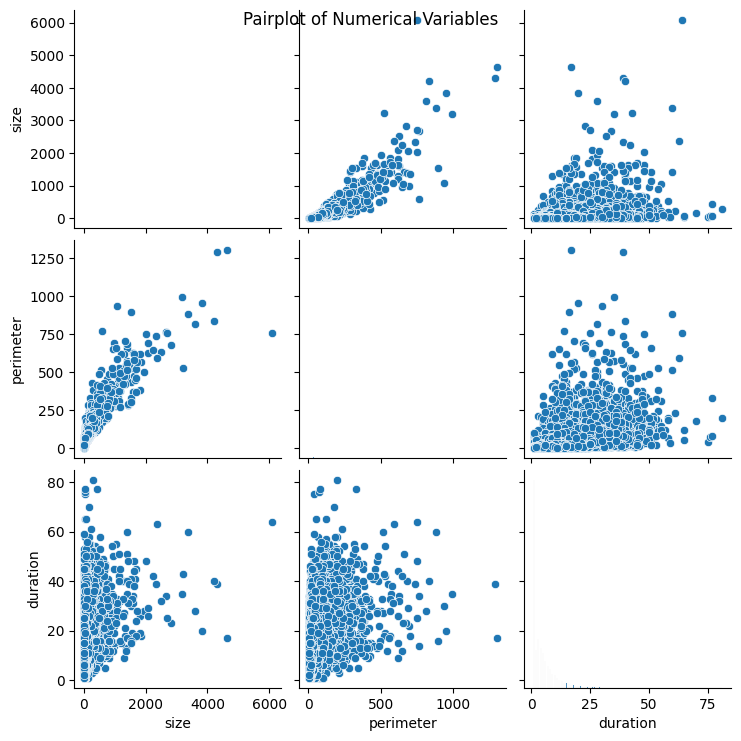

In [42]:
sns.pairplot(df[['size', 'perimeter', 'duration']])
plt.suptitle('Pairplot of Numerical Variables')
plt.show()

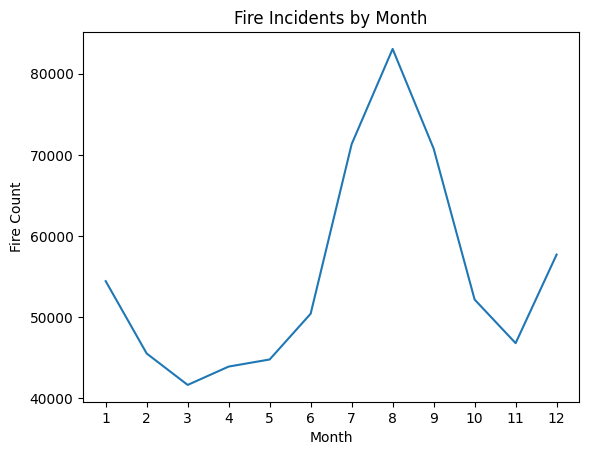

In [43]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['month'] = df['start_date'].dt.month
fire_counts_by_month = df['month'].value_counts().sort_index()
plt.plot(fire_counts_by_month.index, fire_counts_by_month.values)
plt.xlabel('Month')
plt.ylabel('Fire Count')
plt.title('Fire Incidents by Month')
plt.xticks(range(1, 13))
plt.show()

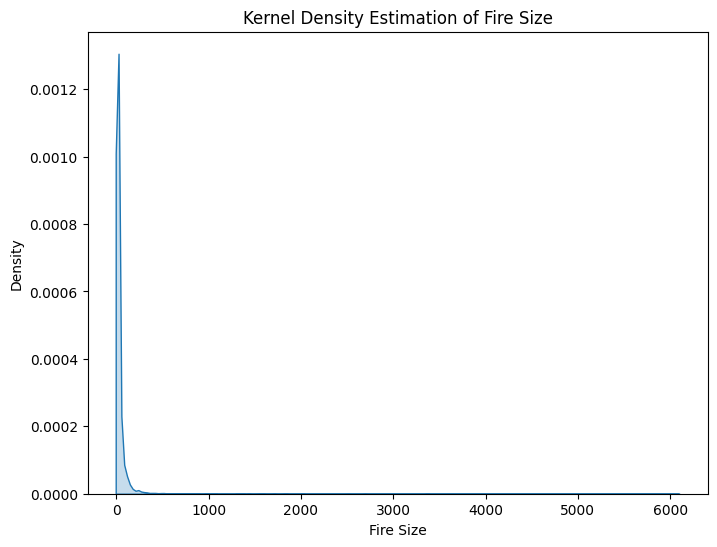

In [45]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['size'], fill=True)
plt.xlabel('Fire Size')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Fire Size')
plt.show()

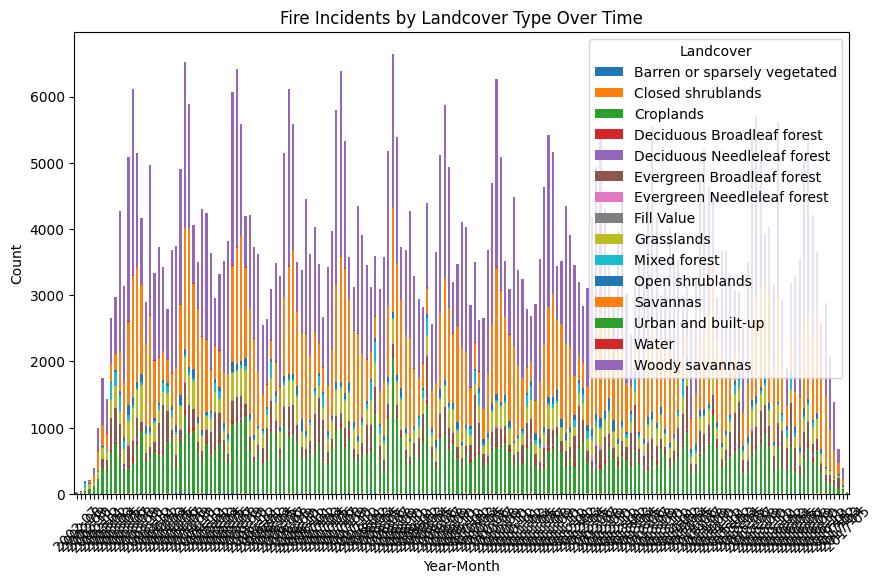

In [47]:
df['year_month'] = df['start_date'].dt.to_period('M')
landcover_counts_by_month = df.groupby(['year_month', 'landcover_s']).size().unstack()
landcover_counts_by_month.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.title('Fire Incidents by Landcover Type Over Time')
plt.legend(title='Landcover')
plt.xticks(rotation=45)
plt.show()

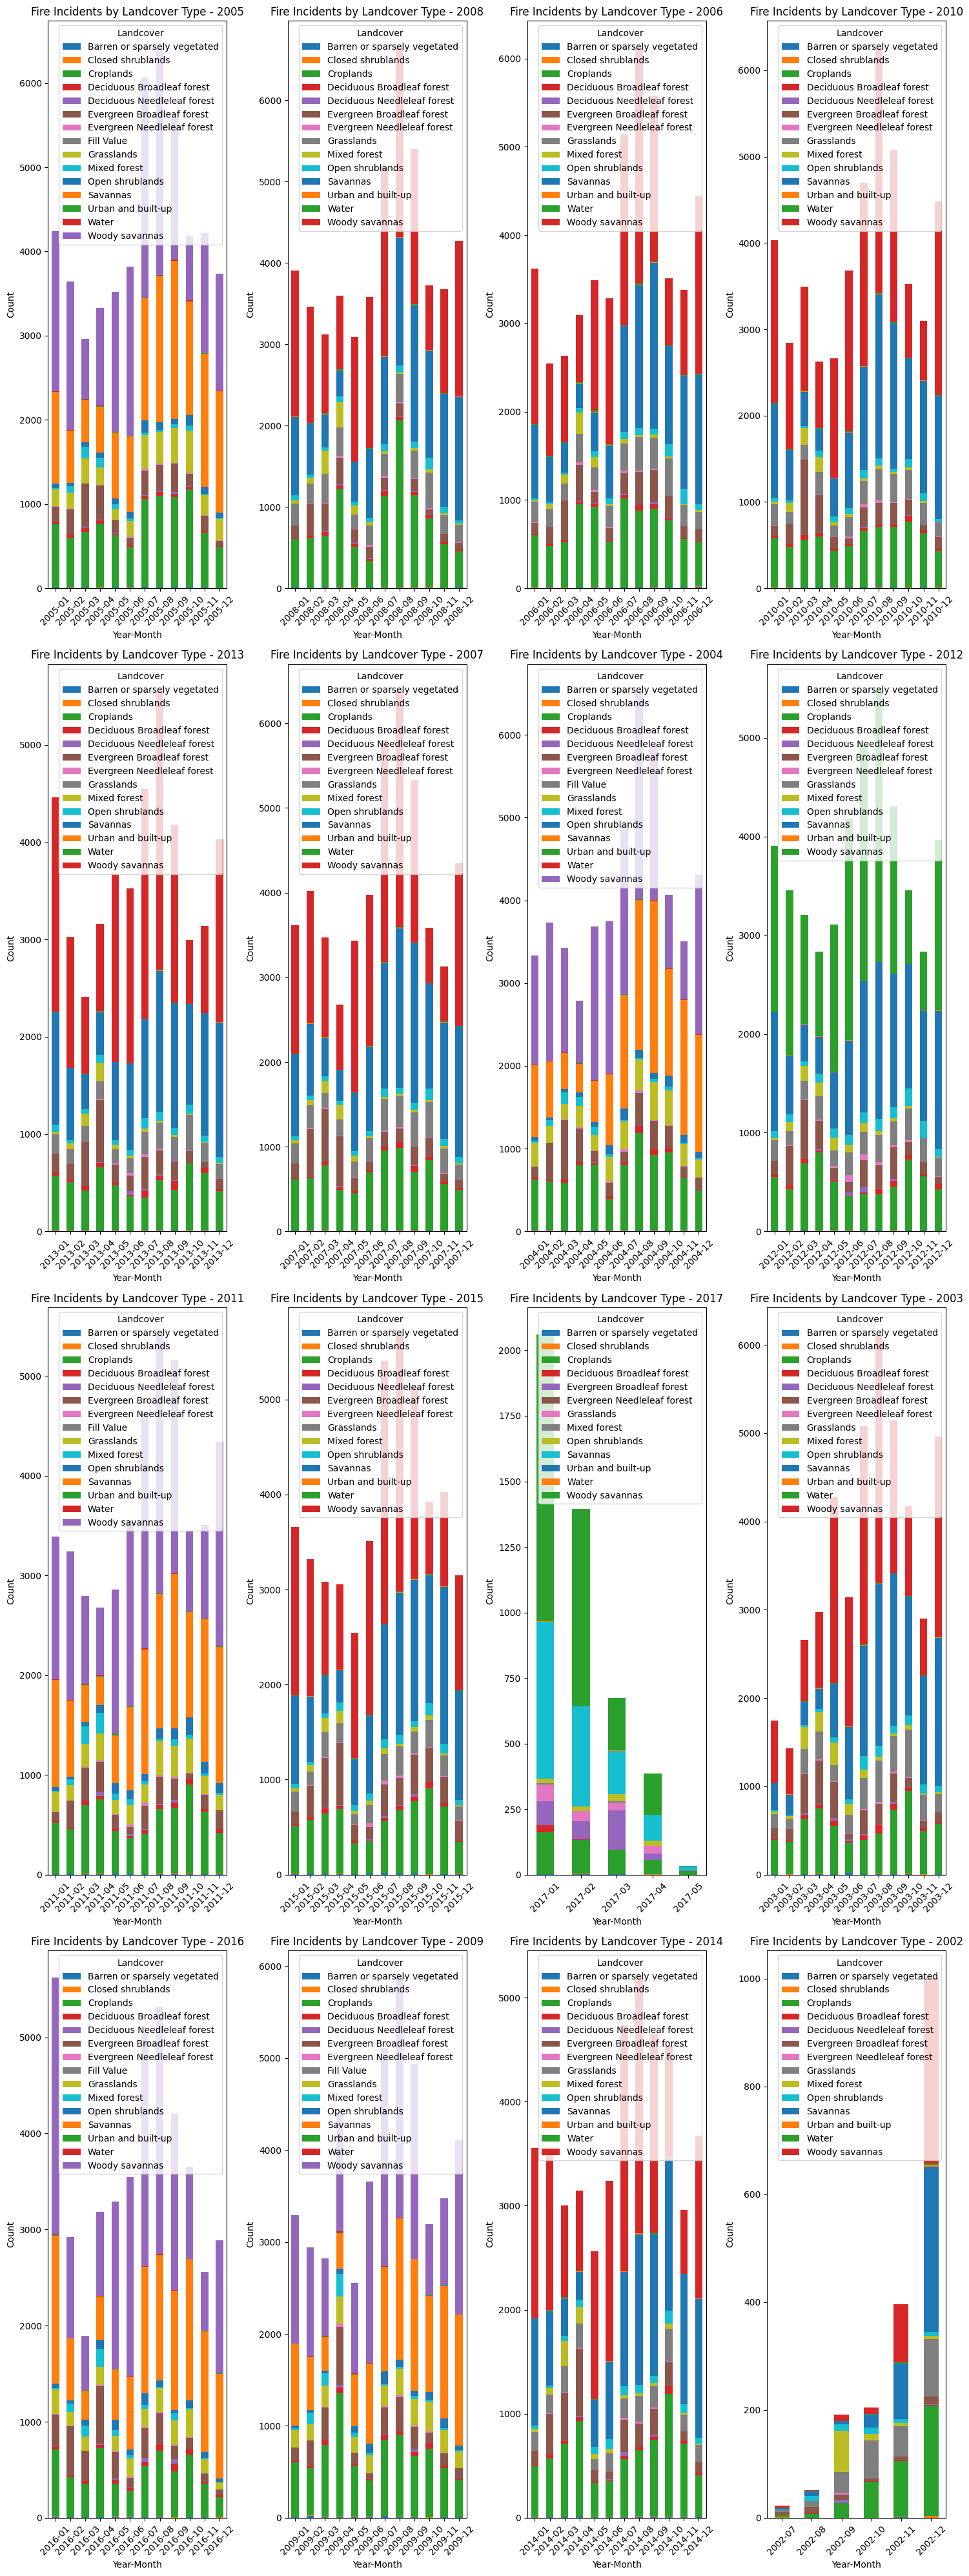

In [70]:
import matplotlib.pyplot as plt
import math

df['year_month'] = df['start_date'].dt.to_period('M')
years = df['start_date'].dt.year.unique()
num_years = len(years)
num_cols = 4
num_rows = math.ceil(num_years / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10*num_rows))

for i, year in enumerate(years):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    filtered_df = df[df['start_date'].dt.year == year]
    landcover_counts_by_month = filtered_df.groupby(['year_month', 'landcover_s']).size().unstack()
    landcover_counts_by_month.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel('Year-Month')
    ax.set_ylabel('Count')
    ax.set_title(f'Fire Incidents by Landcover Type - {year}')
    ax.legend(title='Landcover')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [85]:
df['year_month'] = df['start_date'].dt.to_period('M')
years = df['start_date'].dt.year.unique()

landcover_dict = {}
for i, year in enumerate(years):
    filtered_df = df[df['start_date'].dt.year == year]
    landcover_counts_by_month = filtered_df.groupby(['year_month', 'landcover_s']).size().unstack()
    landcover_dict[year] = landcover_counts_by_month

In [104]:
# merging all the dictionary values into one dataframe
df_merged = pd.concat(landcover_dict.values(), keys=landcover_dict.keys())

df_merged.fillna(0, inplace=True)
df_merged.reset_index(inplace=True)

<Axes: xlabel='landcover_s', ylabel='landcover_s'>

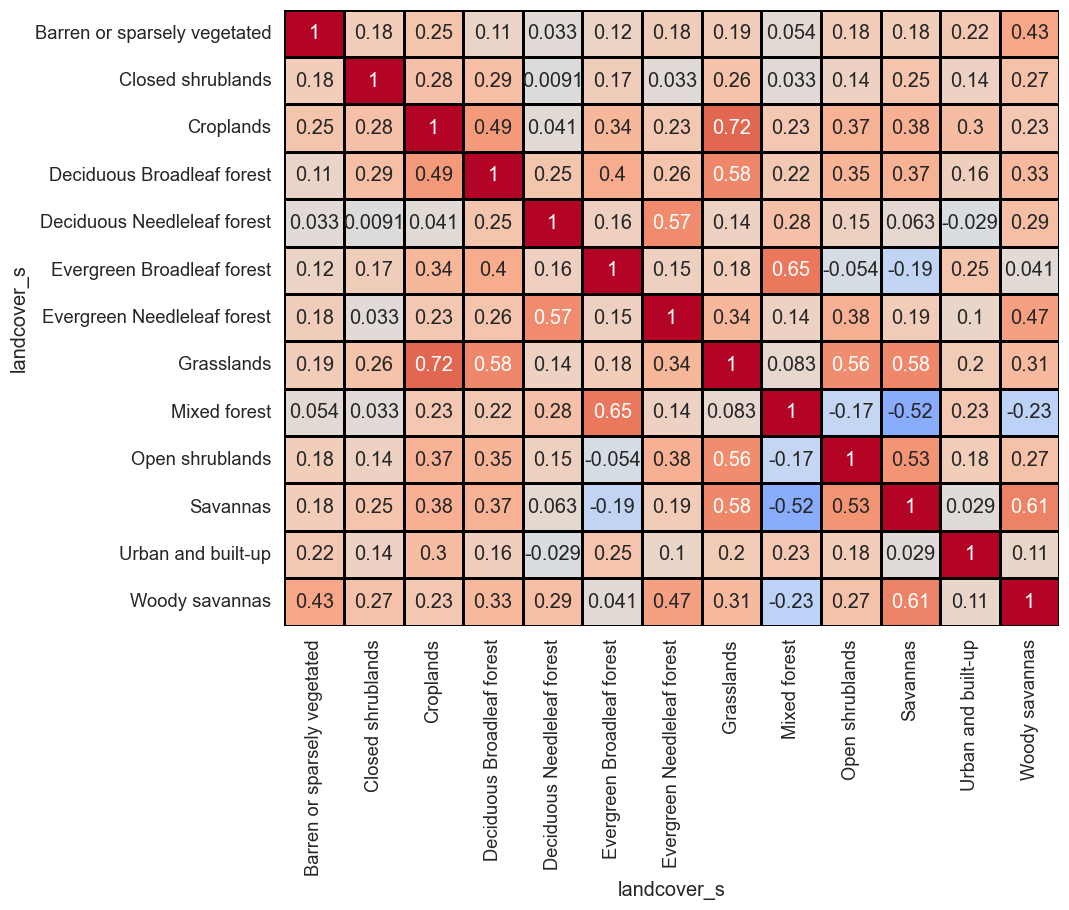

In [122]:
columns_of_interest = ['Barren or sparsely vegetated', 'Closed shrublands', 'Croplands', 'Deciduous Broadleaf forest',
                       'Deciduous Needleleaf forest', 'Evergreen Broadleaf forest', 'Evergreen Needleleaf forest',
                       'Grasslands', 'Mixed forest', 'Open shrublands', 'Savannas', 'Urban and built-up', 'Woody savannas']

# Calculate the correlation matrix
correlation_matrix = df_merged[columns_of_interest].corr()

sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=1, linecolor='black', cbar=False)

In [129]:
# for all year_month in landcover_dict

{2005: landcover_s  Barren or sparsely vegetated  Closed shrublands  Croplands   
 year_month                                                                
 2005-01                               9.0                3.0      747.0  \
 2005-02                              12.0                7.0      583.0   
 2005-03                               5.0                6.0      655.0   
 2005-04                               1.0                5.0      764.0   
 2005-05                              13.0                3.0      612.0   
 2005-06                              12.0                3.0      473.0   
 2005-07                              13.0                4.0     1039.0   
 2005-08                               9.0                1.0     1086.0   
 2005-09                               6.0                2.0     1072.0   
 2005-10                               5.0                2.0     1164.0   
 2005-11                              10.0                1.0      651.0   
 2005-

In [80]:
## creating a correlation between which years seem most similar in terms of fire incidents

import numpy as np
from sklearn.cluster import KMeans

# Select the relevant columns for clustering
data = df.groupby('start_date').agg({'landcover_area': 'sum', 'landcover_count': 'sum'}).reset_index()
X = data[['landcover_area', 'landcover_count']].values

# Define the number of clusters
num_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels to each year
data['cluster'] = kmeans.labels_

# Print the cluster assignments
print(data[['start_date', 'cluster']].sort_values('start_date'))

KeyError: "Column(s) ['landcover_area', 'landcover_count'] do not exist"

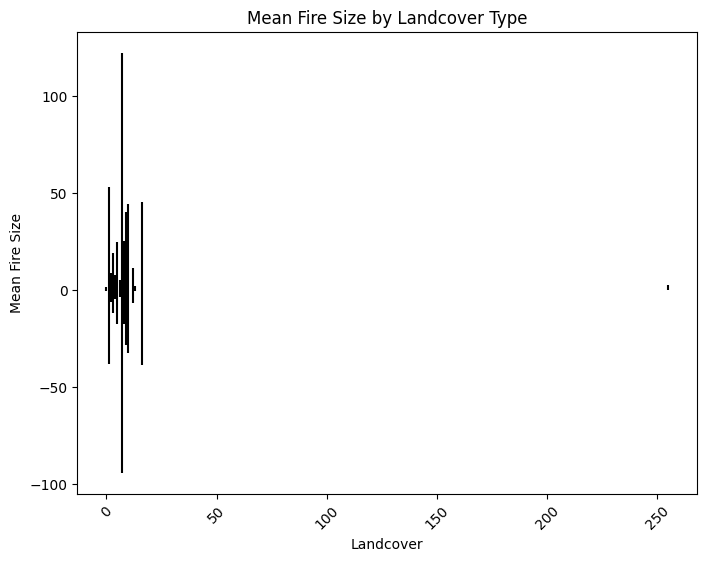

In [51]:
mean_size_by_landcover = df.groupby('landcover')['size'].mean()
std_size_by_landcover = df.groupby('landcover')['size'].std()

plt.figure(figsize=(8, 6))
plt.bar(mean_size_by_landcover.index, mean_size_by_landcover.values, yerr=std_size_by_landcover.values)
plt.xlabel('Landcover')
plt.ylabel('Mean Fire Size')
plt.title('Mean Fire Size by Landcover Type')
plt.xticks(rotation=45)
plt.show()